### ANOVAs ###

In [16]:
import pandas as pd
import nibabel as nib
from glob import glob
import numpy as np
import statsmodels.api as sp
#imported the full paths since it wasn't working otherwise - not sure why 
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in data
df_tabular = pd.read_csv('../resources/merged_tabular_withconn.tsv',sep='\t')

In [3]:
#just get LOBE dataset 
df_LOBE = df_tabular[df_tabular["dataset"] == "LOBE"]

#just get HCP dataset
df_HCP = df_tabular[df_tabular["dataset"] == "HCP"]

In [5]:
df_LOBE

,participant_id,dataset,age,sex,age_seizure_onset,age_ep_diagnosis,ep_duration_first_scan,seizure_duration_first_scan,pnes,benign_rolandic,...,NFC_Limbic,NFC_Cont,NFC_Default,NSC_Vis,NSC_SomMot,NSC_DorsAttn,NSC_SalVentAttn,NSC_Limbic,NSC_Cont,NSC_Default
341,sub-004,LOBE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.018775,0.041168,0.005356,4.579539,4.814665,8.650834,7.161025,6.553801,7.372455,8.310777
342,sub-006,LOBE,9.0,M,7.0,8.0,1.0,2.0,0.0,0.0,...,0.242738,0.337645,0.289935,4.145457,4.446113,7.507796,7.520987,6.103175,7.077718,7.506009
343,sub-007,LOBE,9.0,F,7.0,7.0,2.0,2.0,0.0,0.0,...,0.040016,0.055915,0.013688,4.204648,4.599075,7.685924,7.358690,6.379661,7.868797,8.170206
344,sub-009,LOBE,8.0,M,2.0,8.0,0.0,6.0,0.0,0.0,...,0.149506,0.225325,0.161981,4.746400,4.932821,8.163475,7.933496,6.782750,7.915946,8.016987
345,sub-010,LOBE,15.0,M,7.0,7.0,8.0,8.0,0.0,0.0,...,0.090205,0.100796,0.137763,4.871239,4.773398,8.486071,7.745592,6.801370,7.437233,7.650061
346,sub-012,LOBE,14.0,F,4.0,10.0,4.0,10.0,0.0,0.0,...,0.100053,0.078775,0.079218,4.415125,5.241261,8.339976,7.969151,5.192593,7.796126,7.932576
347,sub-013,LOBE,15.0,F,13.0,14.0,1.0,2.0,0.0,0.0,...,0.098577,0.111910,-0.060181,4.366664,4.650835,8.140972,8.063873,6.307177,6.728226,8.191708
348,sub-014,LOBE,14.0,M,9.0,9.0,5.0,5.0,0.0,0.0,...,0.163124,0.184982,0.137038,3.941506,4.377840,7.481228,7.161544,5.845067,6.881972,6.903640
349,sub-015,LOBE,10.0,M,7.0,7.0,3.0,3.0,0.0,1.0,...,0.088092,0.083745,0.146137,4.748719,4.817123,8.132359,8.456751,6.915088,7.112231,8.904368
350,sub-017,LOBE,15.0,F,10.0,10.0,5.0,5.0,0.0,0.0,...,0.139618,0.212389,0.068701,4.343549,4.817297,8.927881,7.736918,6.661295,8.214395,8.558814


In [108]:
#get temporal and nontemporal groups
temporal = df_LOBE[df_LOBE["loc_final_temporal"] == 1]
nontemporal = df_LOBE[df_LOBE["loc_final_temporal"] == 0]

#make sure pulling right subs
df_temporal = temporal["participant_id"]
df_nontemporal = nontemporal["participant_id"]

print(df_temporal)

343    sub-007
344    sub-009
346    sub-012
347    sub-013
348    sub-014
351    sub-019
355    sub-024
356    sub-025
358    sub-027
Name: participant_id, dtype: object


In [113]:
x1 = temporal["NSFC_Vis"]
x2 = df_HCP["NSFC_Vis"]

In [114]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.9965201120683971

In [97]:
#get female and male groups
female = df_HCP[df_HCP["sex"] == "F"]
male = df_HCP[df_HCP["sex"] == "M"]

#make sure pulling right subs
df_female = female["participant_id"]
df_male = male["participant_id"]

print(df_female)

1      sub-HCD0021614
2      sub-HCD0026119
5      sub-HCD0051825
6      sub-HCD0059235
8      sub-HCD0075435
            ...      
333    sub-HCD2930055
335    sub-HCD2936875
336    sub-HCD2939275
338    sub-HCD2957277
340    sub-HCD2990073
Name: participant_id, Length: 182, dtype: object


In [103]:
x1 = female["NSFC_Vis"]
x2 = male["NSFC_Vis"]

In [104]:
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
pvals

0.006659269400180441

In [105]:
combined_df = pd.concat([x1,x2])
print(combined_df)

1      0.040637
2      0.150271
5      0.049592
6      0.112601
8      0.015963
         ...   
331    0.088992
332    0.078124
334    0.055592
337    0.077468
339    0.051967
Name: NSFC_Vis, Length: 341, dtype: float64


In [106]:
dre: 'dre_first_scan == 1'
nondre: 'dre_first_scan == 0'
lobe: 'dataset == LOBE'
hcp: 'dataset == HCP'
female: 'sex == F'
male: 'sex == M'


/tmp/ipykernel_1450691/4130304610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex', y='NSFC_Vis', data=df_HCP, palette='Set2')


NameError: name 'y' is not defined

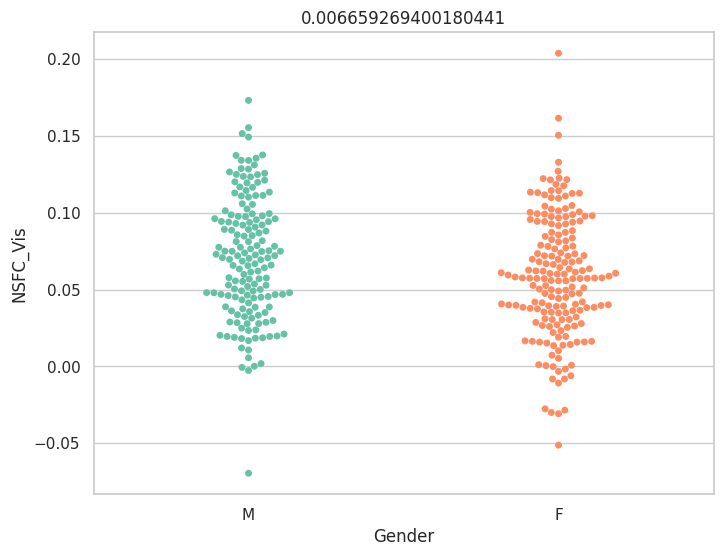

In [107]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create the swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='sex', y='NSFC_Vis', data=df_HCP, palette='Set2')

# Add titles and labels
plt.title(pvals)
plt.xlabel('Gender')
plt.ylabel(y)

# Show the plot
plt.show()

In [24]:

    
tstats,pvals,dfs = ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
plt.figure(figsize=(10,6))

combined_df = pd.concat([x1,x2])

ax = sns.swarmplot(x="sex",y="NSC_Vis",data=combined_df)
    
pvals
plt.title(f'{x1} vs {x2}, p-value={pvals}')

#out_png = .png'
#plt.savefig(out_png)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>